<a href="https://colab.research.google.com/github/SalehMehrabani/PyTorch-Deep-Learning/blob/main/NN9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Classification




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch 
from torch import nn

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split

In [12]:
NUM_CLASSES = 4
NUM_FEATURE = 2
RANDOM_SEED = 42
NUM_SAMPLE = 1000

X_blob, y_blob = make_blobs(n_samples=NUM_SAMPLE,
                           n_features=NUM_FEATURE,
                           centers= NUM_CLASSES, 
                           cluster_std=1.5,
                           random_state= RANDOM_SEED)

In [16]:
X_blob= torch.from_numpy(X_blob).type(torch.float).to(device)
y_blob= torch.from_numpy(y_blob).type(torch.float).to(device)

In [21]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(
    X_blob, y_blob, random_state=42, test_size=0.2
)

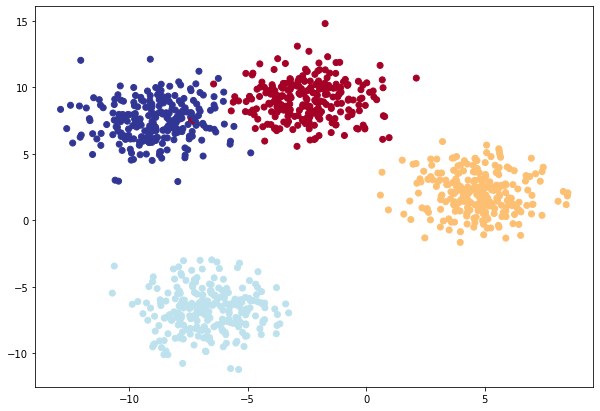

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0].cpu(), X_blob[:,1].cpu(), c=y_blob.cpu(), cmap= plt.cm.RdYlBu)

In [30]:
class BlobModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers= nn.Sequential(
        nn.Linear(2, 10),
        nn.ReLU(),
        nn.Linear(10, 10),
        nn.ReLU(),
        nn.Linear(10, 4)
    )
  def forward(self, x):
    x=self.layers(x)
    return(x)

model_0= BlobModel()
model_0

BlobModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)